@author: [s16496@pjwstk.edu.pl](mailto:s16496@pjwstk.edu.pl)

Pobieram potrzebne mi biblioteki NumPy - do operacji na tablicach, Pandas - do analizy i czyszczenia danych, Sklearn - do machine learningu oraz plotly express, matplotlib i seaborn do wizualizacji

In [5]:
import plotly
plotly.__version__

'4.4.1'

In [6]:
import plotly.express as px

In [7]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.19.5
Pandas: 1.1.5


In [8]:
ls


drive/  sample_data/


Pobieram i wyświetlam dane

In [9]:
house_data = pd.read_csv('drive/MyDrive/housing.csv')
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Sprawdzam na wykresach jak rozkładają się dane

In [10]:
px.scatter_matrix(data_frame=house_data, dimensions=['median_house_value', 'housing_median_age','total_rooms', 'total_bedrooms'],
                  color='ocean_proximity', title='Scatter Matrix - houses')

Regresję liniową wyrażnie mogę zastosować przewidując ilość sypialni w stosunku do ilości pokoi

Wyciągam tylko potrzbne dane

In [11]:
house_data = house_data[['total_rooms', 'total_bedrooms']]
house_data

,total_rooms,total_bedrooms
0,880.0,129.0
1,7099.0,1106.0
2,1467.0,190.0
3,1274.0,235.0
4,1627.0,280.0
...,...,...
20635,1665.0,374.0
20636,697.0,150.0
20637,2254.0,485.0
20638,1860.0,409.0


Sprawdzam typ danych

In [12]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_rooms     20640 non-null  float64
 1   total_bedrooms  20433 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


Czyszcze dane i zmieniam typ na int

In [13]:
with pd.option_context('mode.use_inf_as_null', True):
   house_data = house_data.dropna()

In [14]:
house_data.astype('int32').dtypes

total_rooms       int32
total_bedrooms    int32
dtype: object

Dziele dane na treningowe i testowe

In [15]:
from sklearn.model_selection import train_test_split
house_data_test, house_data_train = train_test_split(house_data, test_size=1000)

In [16]:
house_data_train

,total_rooms,total_bedrooms
5719,2507.0,517.0
6202,2374.0,450.0
15322,1251.0,220.0
14664,2119.0,444.0
969,2948.0,471.0
...,...,...
2206,4055.0,735.0
15145,3047.0,495.0
2135,2128.0,442.0
13277,2839.0,659.0


In [17]:
house_data_test

,total_rooms,total_bedrooms
13457,1497.0,264.0
8736,3792.0,790.0
18955,7937.0,1635.0
12858,1001.0,228.0
15845,2155.0,468.0
...,...,...
14269,200.0,77.0
10955,1768.0,474.0
19977,4642.0,1300.0
11735,3436.0,755.0


Przyglądam się prawidłowości rozkładu zbioru treningowego i testowego

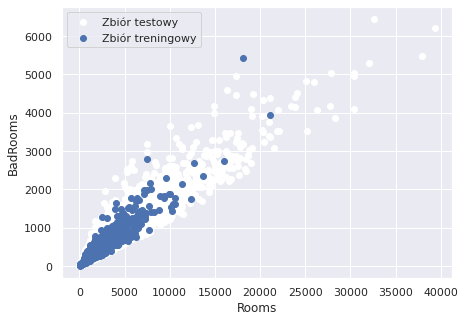

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

alpha = 0.5
plt.figure(figsize=(7, 5))
plt.scatter(house_data_test.total_rooms, house_data_test.total_bedrooms, c='w', label='Zbiór testowy')
plt.scatter(house_data_train.total_rooms, house_data_train.total_bedrooms, c='b', label='Zbiór treningowy')
plt.xlabel('Rooms')
plt.ylabel('BadRooms')
plt.legend()

Stosuje regresję liniową z biblioteki

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(house_data_train.total_rooms.values.reshape(-1, 1), house_data_train.total_bedrooms)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Oceniam jakość modelu

In [20]:
lin_reg.score(house_data_train.total_rooms.values.reshape(-1, 1), house_data_train.total_bedrooms)

0.846996331478119

Punktacja jest zadowalająca. Sprawdzam wizualnie dopasowanie modelu. Korzystam z coef(wartości wag) i intercept (wartość wyrazu wolnego) żeby wyrysować prostą regresji

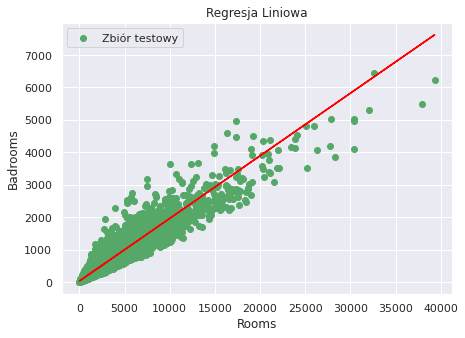

In [21]:
house_data_pred = lin_reg.predict(house_data_train.total_rooms.values.reshape(-1, 1))
plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa')
plt.scatter(house_data_test.total_rooms, house_data_test.total_bedrooms, c='g', label='Zbiór testowy')
plt.plot(house_data.total_rooms, lin_reg.intercept_ + lin_reg.coef_[0] * house_data.total_rooms, c='red')
plt.xlabel('Rooms')
plt.ylabel('Badrooms')
plt.legend()

Jakość modelu dla zbioru testowego

In [22]:
lin_reg.score(house_data_test.total_rooms.values.reshape(-1, 1), house_data_test.total_bedrooms)

0.8613879427555221

## SVM

Wykorzystuje Support Vector regression typ support vector machine obsługujący regresję

Importuje potrzebne metody

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

Standaryzuje cechy (usunięcie średniej, skalowanie do wariancji jednostkowek)

In [26]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(house_data_test.total_rooms.values.reshape(-1, 1))
y = sc_y.fit_transform(house_data_test.total_bedrooms.values.reshape(-1, 1))

Ustawiam typ regresji na linearną i przypisuje do niej dane

In [27]:
regressor = SVR(kernel='linear')
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Wizualizacja rezultatu SVR

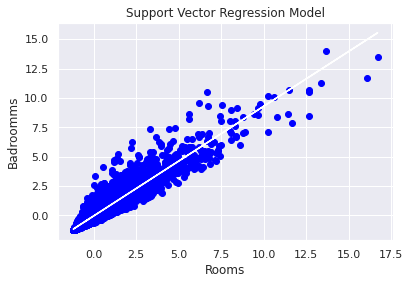

In [30]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'white')
plt.title('Support Vector Regression Model')
plt.xlabel('Rooms')
plt.ylabel('Badroomms')
plt.show()

## Sieć neuronowa - na bazie TensorFLow

Importuje TensorFlow

In [46]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


Wydzielam cechę którą będzie przewidywał model

In [72]:
train_features = house_data_train.copy()
test_features = house_data_test.copy()

train_labels = train_features.pop('total_bedrooms')
test_labels = test_features.pop('total_bedrooms')

In [73]:
train_labels

5719     517.0
6202     450.0
15322    220.0
14664    444.0
969      471.0
         ...  
2206     735.0
15145    495.0
2135     442.0
13277    659.0
17083    266.0
Name: total_bedrooms, Length: 1000, dtype: float64

Tworzę warstwę normalizacji

In [75]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [76]:
print(normalizer.mean.numpy())

[2578.19]


In [77]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[2507.]]

Normalized: [[-0.04]]


Normalizuje ilość pokoi

In [79]:
rooms = np.array(train_features['total_rooms'])

rooms_normalizer = preprocessing.Normalization(input_shape=[1,])
rooms_normalizer.adapt(rooms)

Buduje model sekwencyjny

In [80]:
rooms_model = tf.keras.Sequential([
    rooms_normalizer,
    layers.Dense(units=1)
])

rooms_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_14 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [81]:
rooms_model.predict(rooms[:10])

array([[ 0.00876371],
       [ 0.02513644],
       [ 0.16338138],
       [ 0.05652777],
       [-0.04552481],
       [-1.9147245 ],
       [ 0.06859189],
       [ 0.24906124],
       [-0.04466309],
       [-0.15742564]], dtype=float32)

Konfiguracja metody uczenia

In [127]:
rooms_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Odpalenie uczenia

In [128]:
%%time
history = rooms_model.fit(
    train_features['total_rooms'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 11.7 s, sys: 339 ms, total: 12 s
Wall time: 11.3 s


Sprawdzenie historii uczenia

In [129]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,99.829300,84.611923,95
96,99.834717,84.600449,96
97,99.839294,84.633293,97
98,99.827728,84.625389,98
99,99.834755,84.612244,99


In [130]:
x = tf.linspace(0.0, 20000, 20000)
y = rooms_model.predict(x)

In [131]:
def plot_rooms(x, y):
  plt.scatter(train_features['total_rooms'], train_labels, label='Dane')
  plt.plot(x, y, color='r', label='Przewidywania')
  plt.xlabel('Rooms')
  plt.ylabel('BadRooms')
  plt.legend()

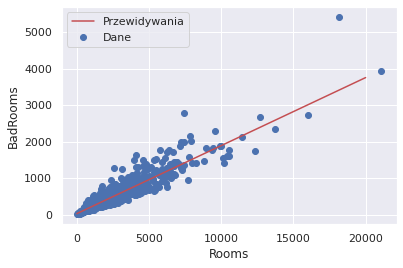

In [132]:
plot_rooms(x,y)